## Nash a a prior

## Behavioural likelihood

   Container  Multiplier  Inhabitants  Nash (Prior) x  Behavior x  \
0          1          10            1        0.018370    0.046450   
1          2          80            6        0.166962    0.090472   
2          3          37            3        0.074970    0.074072   
3          4          90           10        0.155332    0.038030   
4          5          31            2        0.067948    0.139544   
5          6          17            1        0.038229    0.188364   
6          7          50            4        0.101851    0.076583   
7          8          20            2        0.036740    0.046450   
8          9          73            4        0.167103    0.241864   
9         10          89            8        0.172495    0.058170   

   Posterior x  Nash Expected Payoff  Posterior Expected Payoff  
0     0.008200              3.524823                   5.494463  
1     0.145162              3.524823                   3.899353  
2     0.053366              3.524823      

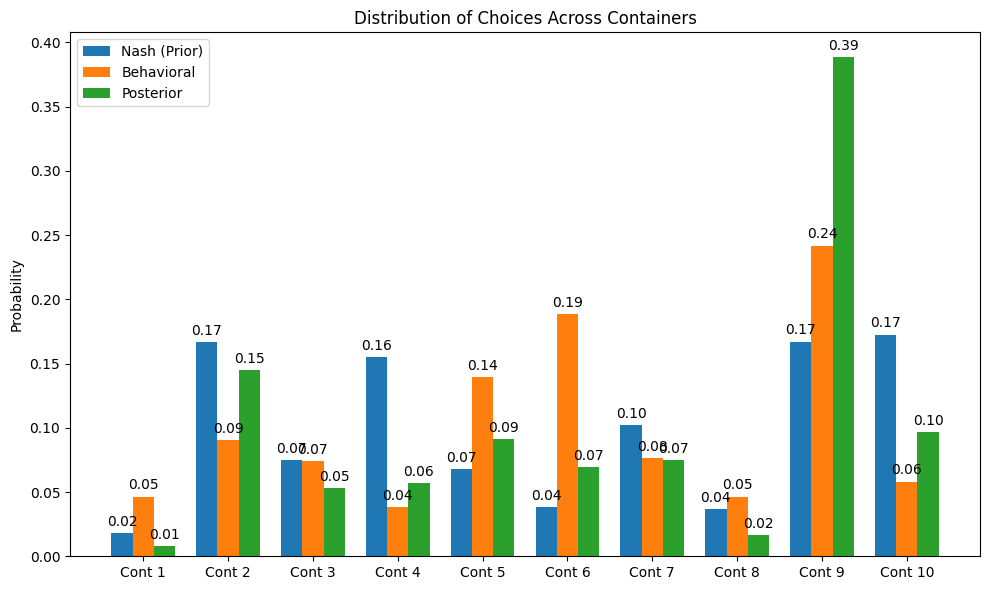

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === PARAMETERS AND DATA ===
# Define container parameters (multipliers and base inhabitants) for 10 containers.
# Note: Containers are numbered 1 through 10, but array indices run from 0 to 9.
multipliers = np.array([10, 80, 37, 90, 31, 17, 50, 20, 73, 89])
inhabitants  = np.array([1, 6, 3, 10, 2, 1, 4, 2, 4, 8])

# Total number of players in the game.
total_players = 30000

# === CONTINUUM APPROXIMATION: Nash Equilibrium Calculation (Prior) ===
# The payoff formula is:
#     u_i = m_i / (c_i + (n_i/300)).
# With n_i = total_players * x_i and total_players/300 = 100, we obtain:
#     u_i = m_i / (c_i + 100*x_i)
#
# In Nash equilibrium with payoff U, for each container i, we have:
#     m_i / (c_i + 100*x_i) = U,
# which can be rearranged to:
#     x_i = (m_i/U - c_i) / 100.
#
# Also, normalization requires sum(x_i) = 1.
# This leads to:
#     (1/U) * sum(m_i) - sum(c_i) = 100,
# so that:
sum_m = np.sum(multipliers)
sum_c = np.sum(inhabitants)
U = sum_m / (100 + sum_c)   # Equilibrium per-player payoff

# Compute the Nash equilibrium fractions (these serve as our prior probabilities).
nash_x = (multipliers / U - inhabitants) / 100
nash_x /= np.sum(nash_x)  # Normalizing to sum to 1

# === EXPECTED PAYOFFS AT NASH EQUILIBRIUM ===
# For each container i, if a fraction nash_x of players use it, the Nash payoff is:
#     payoff_nash_i = m_i / (c_i + 100 * nash_x_i)
nash_payoffs = multipliers / (inhabitants + 100 * nash_x)

# === BEHAVIORAL DISTRIBUTION (Likelihood) ===
# Many human players might follow a simple heuristic based on the naive attractiveness:
#     attractiveness_i = multiplier_i / inhabitant_i.
# We then use a softmax to convert these scores into a probability distribution.
attractiveness = multipliers / inhabitants

def softmax(a, alpha=1.0):
    # Compute a softmax over array a with sensitivity parameter alpha.
    exp_a = np.exp(alpha * (a - np.max(a)))  # subtract max for numerical stability
    return exp_a / np.sum(exp_a)

# Set a parameter alpha that determines how strongly players lean toward high attractiveness.
alpha = 0.2
behavior_x = softmax(attractiveness, alpha=alpha)

# === BAYESIAN UPDATE: Form the Posterior Distribution ===
# We combine the Nash prior and the behavioral likelihood.
posterior_x = nash_x * behavior_x
posterior_x /= np.sum(posterior_x)  # Normalize to sum to 1

# === EXPECTED PAYOFFS USING THE POSTERIOR DISTRIBUTION ===
# Expected payoff for container i is given by:
#     payoff_i = m_i / (c_i + 100 * posterior_x_i)
posterior_payoffs = multipliers / (inhabitants + 100 * posterior_x)

# === FIND RECOMMENDED CONTAINER ===
# The recommended container is the one with the highest expected payoff (using the posterior model).
# Remember: Container numbers are index+1.
best_index = np.argmax(posterior_payoffs)
recommended_container = best_index + 1

# === OUTPUT RESULTS ===
df = pd.DataFrame({
    'Container': np.arange(1, 11),
    'Multiplier': multipliers,
    'Inhabitants': inhabitants,
    'Nash (Prior) x': nash_x,
    'Behavior x': behavior_x,
    'Posterior x': posterior_x,
    'Nash Expected Payoff': nash_payoffs,
    'Posterior Expected Payoff': posterior_payoffs
})
print(df)
print("\nRecommended container to choose (based on posterior expected payoff): Container", recommended_container)

# === PLOTTING DISTRIBUTIONS ===
# Create a grouped bar chart to compare the distributions (Nash prior, Behavioral, and Posterior).
labels = [f'Cont {i}' for i in range(1, 11)]
x = np.arange(len(labels))  # the label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, nash_x, width, label='Nash (Prior)')
rects2 = ax.bar(x, behavior_x, width, label='Behavioral')
rects3 = ax.bar(x + width, posterior_x, width, label='Posterior')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Distribution of Choices Across Containers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Optionally add text for labels on the bars.
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

   Container  Multiplier  Inhabitants  Nash Prior  Attractiveness Likelihood  \
0          1          10            1    0.018370                   0.027589   
1          2          80            6    0.166962                   0.074995   
2          3          37            3    0.074970                   0.055558   
3          4          90           10    0.155332                   0.020439   
4          5          31            2    0.067948                   0.143656   
5          6          17            1    0.038229                   0.225298   
6          7          50            4    0.101851                   0.058406   
7          8          20            2    0.036740                   0.027589   
8          9          73            4    0.167103                   0.327806   
9         10          89            8    0.172495                   0.038665   

   Overcrowding Likelihood  Updated Prior  Nash Payoff  Updated Payoff  
0                     0.10       0.010725     

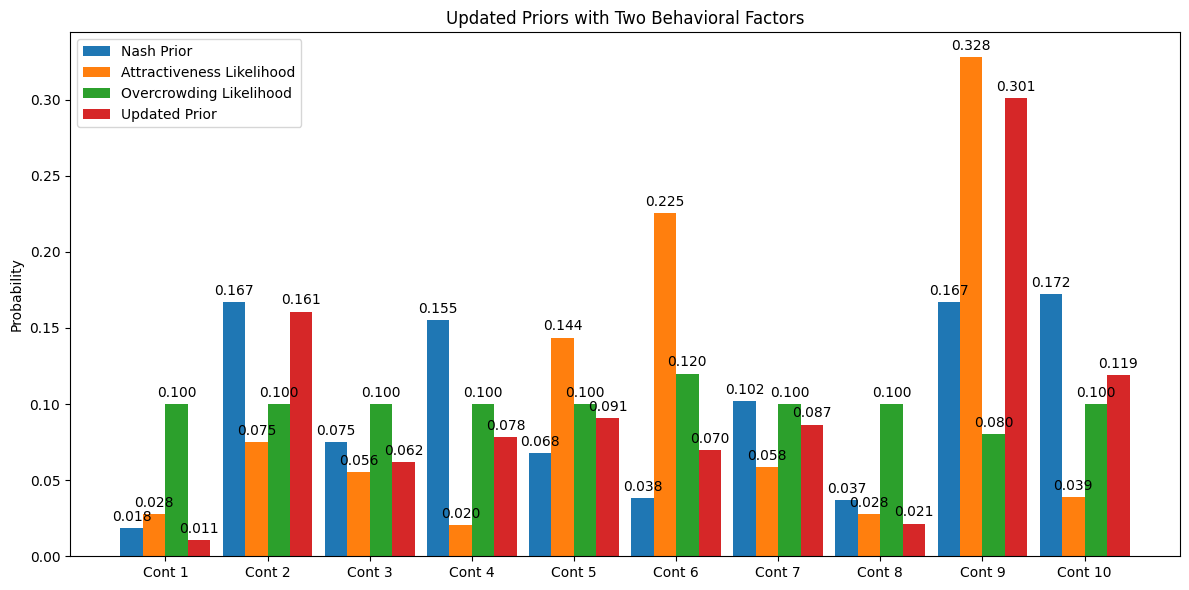

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === PARAMETERS AND DATA ===
# Containers numbered 1 to 10; array indices 0..9 correspond to containers 1..10.
multipliers = np.array([10, 80, 37, 90, 31, 17, 50, 20, 73, 89])
inhabitants  = np.array([1, 6, 3, 10, 2, 1, 4, 2, 4, 8])
total_players = 30000

# === CONTINUUM APPROXIMATION: Nash Equilibrium (Prior) ===
# Using the formula:  u_i = m_i / (c_i + 100*x_i), where
# In equilibrium:  x_i = (m_i/U - c_i) / 100, with U = sum(m_i) / (100 + sum(c_i))
sum_m = np.sum(multipliers)
sum_c = np.sum(inhabitants)
U = sum_m / (100 + sum_c)
nash_x = (multipliers / U - inhabitants) / 100
nash_x /= np.sum(nash_x)  # Normalization to sum to 1

# === BEHAVIORAL FACTOR 1: ATTRACTION (Level-0 Behavior) ===
# Compute raw attractiveness as multiplier/inhabitants.
attractiveness = multipliers / inhabitants

def softmax(a, alpha=1.0):
    # Compute softmax with sensitivity parameter alpha.
    exp_a = np.exp(alpha * (a - np.max(a)))  # subtract max for numerical stability
    return exp_a / np.sum(exp_a)

# Use softmax over attractiveness as the likelihood for level-0.
alpha_attr = 0.3  # tune this parameter based on behavioral study estimates
L_attr = softmax(attractiveness, alpha=alpha_attr)

# === BEHAVIORAL FACTOR 2: OVERCROWDING ADJUSTMENT (Level-1 Behavior) ===
# Behavioral studies often show that many players overweight obvious options.
# For instance, if container 9 (index 8) is very attractive, many naive players might pick it.
# We model a correction by shifting some probability mass from container 9 to container 6.
L_crowd = np.ones_like(nash_x)  # start with a flat likelihood
shift_fraction = 0.2  # 20% of container 9's probability is reallocated
shift_amount = shift_fraction  # Here we take a fixed value for illustration
L_crowd[8] = 1 - shift_amount  # reduce likelihood for container 9
L_crowd[5] = 1 + shift_amount  # boost likelihood for container 6
# (One could also design this factor using other behavioral data; this is a simple example.)
L_crowd /= np.sum(L_crowd)  # normalize the likelihood

# === COMBINING PRIOR WITH BEHAVIORAL LIKELIHOODS ===
# We combine the Nash prior with the two behavioral likelihoods.
w1 = 0.5  # weight for attractiveness factor
w2 = 0.5  # weight for overcrowding adjustment factor

# Combine via weighted multiplication:
combined = nash_x * (L_attr ** w1) * (L_crowd ** w2)
updated_prior = combined / np.sum(combined)  # normalize

# === EXPECTED PAYOFFS ===
# The per-player payoff for container i: u_i = m_i / (c_i + 100*x_i)
def expected_payoffs(probabilities):
    return multipliers / (inhabitants + 100 * probabilities)

nash_payoffs = expected_payoffs(nash_x)
updated_payoffs = expected_payoffs(updated_prior)

# === FIND RECOMMENDED CONTAINER ===
best_index = np.argmax(updated_payoffs)
recommended_container = best_index + 1  # 1-indexed container number

# === OUTPUT RESULTS ===
df = pd.DataFrame({
    'Container': np.arange(1, 11),
    'Multiplier': multipliers,
    'Inhabitants': inhabitants,
    'Nash Prior': nash_x,
    'Attractiveness Likelihood': L_attr,
    'Overcrowding Likelihood': L_crowd,
    'Updated Prior': updated_prior,
    'Nash Payoff': nash_payoffs,
    'Updated Payoff': updated_payoffs
})
print(df)
print(f"\nRecommended container to choose (based on updated expected payoff): Container {recommended_container}")

# === PLOTTING DISTRIBUTIONS ===
labels = [f'Cont {i}' for i in range(1, 11)]
x_axis = np.arange(len(labels))
width = 0.22

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x_axis - 1.5*width, nash_x, width, label='Nash Prior')
rects2 = ax.bar(x_axis - 0.5*width, L_attr, width, label='Attractiveness Likelihood')
rects3 = ax.bar(x_axis + 0.5*width, L_crowd, width, label='Overcrowding Likelihood')
rects4 = ax.bar(x_axis + 1.5*width, updated_prior, width, label='Updated Prior')

ax.set_ylabel('Probability')
ax.set_title('Updated Priors with Two Behavioral Factors')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    # Attach text labels above the bars.
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

   Container  Multiplier  Inhabitants  Nash Prior  Attractiveness Likelihood  \
0          1          10            1    0.018370                   0.046450   
1          2          80            6    0.166962                   0.090472   
2          3          37            3    0.074970                   0.074072   
3          4          90           10    0.155332                   0.038030   
4          5          31            2    0.067948                   0.139544   
5          6          17            1    0.038229                   0.188364   
6          7          50            4    0.101851                   0.076583   
7          8          20            2    0.036740                   0.046450   
8          9          73            4    0.167103                   0.241864   
9         10          89            8    0.172495                   0.058170   

   Overcrowding Likelihood  Updated Prior  Nash Payoff  Updated Payoff  
0                 0.059567       0.009672     

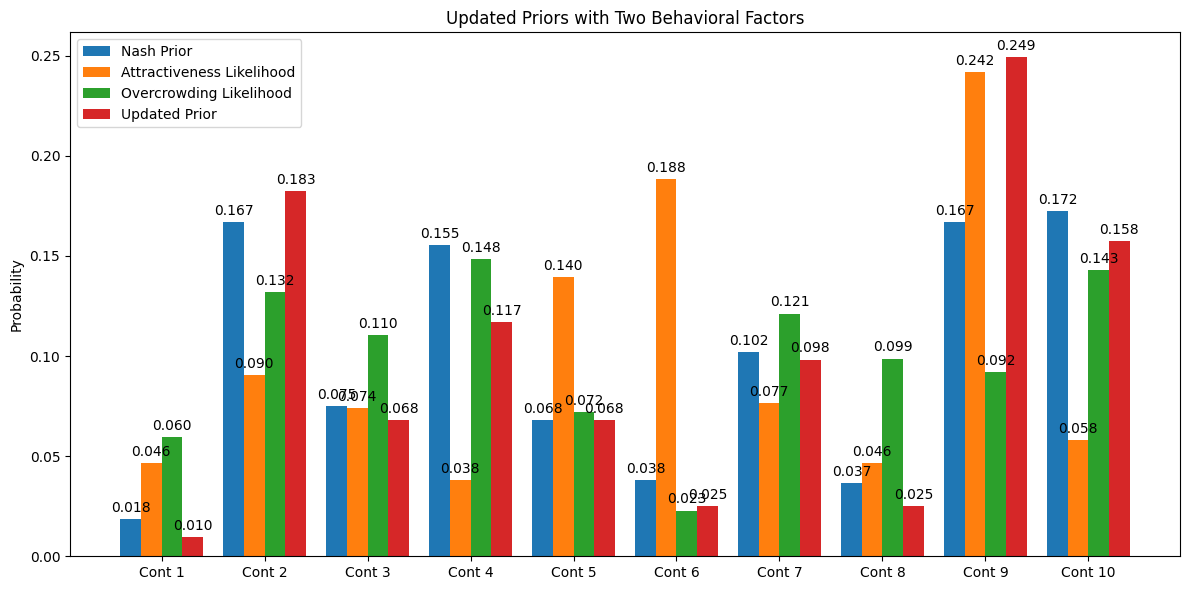

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === PARAMETERS AND DATA ===
# Containers 1 to 10; array indices 0..9 map to containers 1..10.
multipliers = np.array([10, 80, 37, 90, 31, 17, 50, 20, 73, 89])
inhabitants  = np.array([1, 6, 3, 10, 2, 1, 4, 2, 4, 8])
total_players = 30000

# === CONTINUUM APPROXIMATION: Nash Equilibrium (Prior) ===
# Using the payoff function: u_i = m_i / (c_i + (n_i/300)).
# With n_i = total_players * x_i and total_players/300 = 100:
#   u_i = m_i / (c_i + 100*x_i)
# And at equilibrium, we have for each container:
#   x_i = (m_i / U - c_i) / 100, with U = sum(m_i)/(100+sum(c_i)).
sum_m = np.sum(multipliers)
sum_c = np.sum(inhabitants)
U = sum_m / (100 + sum_c)   # Equilibrium per-player payoff
nash_x = (multipliers / U - inhabitants) / 100
nash_x /= np.sum(nash_x)  # Normalize to sum to 1

# === BEHAVIORAL FACTOR 1: ATTRACTION (Level‑0 Behavior) ===
# Compute attractiveness scores:
attractiveness = multipliers / inhabitants

def softmax(a, alpha=1.0):
    exp_a = np.exp(alpha * (a - np.max(a)))  # subtract maximum for stability
    return exp_a / np.sum(exp_a)

alpha_attr = 0.2  # sensitivity parameter for attractiveness
L_attr = softmax(attractiveness, alpha=alpha_attr)

# === BEHAVIORAL FACTOR 2: OVERCROWDING ADJUSTMENT (Level‑1 Behavior) ===
# We define the ratio r_i = L_attr / nash_x.
# If r_i > 1, container i is overhyped (likely to be overcrowded by naive players).
# We then set:
#   L_crowd_i = exp[-beta * (r_i - 1)]
# where beta > 0 determines the strength of the penalty.
beta = 0.4  # Adjust beta to calibrate the correction strength
r = L_attr / nash_x
L_crowd = np.exp(-beta * (r - 1))
# Normalize L_crowd (so that it represents a likelihood scale)
L_crowd /= np.sum(L_crowd)

# === COMBINING THE LIKELIHOODS WITH THE PRIOR ===
# We combine the prior with the two likelihood factors.
# That is, the updated (posterior) probability is proportional to:
#    p_i ∝ p_{i,Nash} * (L_attr_i)^(w1) * (L_crowd_i)^(w2)
w1 = 0.5  # weight for attractiveness likelihood
w2 = 0.5  # weight for overcrowding adjustment likelihood

combined = nash_x * (L_attr ** w1) * (L_crowd ** w2)
updated_prior = combined / np.sum(combined)

# === EXPECTED PAYOFF CALCULATION ===
# Per-player payoff for container i: u_i = m_i / (inhabitants_i + 100*x_i)
def expected_payoffs(probabilities):
    return multipliers / (inhabitants + 100 * probabilities)

nash_payoffs = expected_payoffs(nash_x)
updated_payoffs = expected_payoffs(updated_prior)

# === RECOMMENDED CONTAINER ===
best_index = np.argmax(updated_payoffs)
recommended_container = best_index + 1  # convert index (0-based) to container number

# === OUTPUT RESULTS ===
df = pd.DataFrame({
    'Container': np.arange(1, 11),
    'Multiplier': multipliers,
    'Inhabitants': inhabitants,
    'Nash Prior': nash_x,
    'Attractiveness Likelihood': L_attr,
    'Overcrowding Likelihood': L_crowd,
    'Updated Prior': updated_prior,
    'Nash Payoff': nash_payoffs,
    'Updated Payoff': updated_payoffs
})
print(df)
print(f"\nRecommended container to choose (based on updated expected payoff): Container {recommended_container}")

# === PLOTTING DISTRIBUTIONS ===
labels = [f'Cont {i}' for i in range(1, 11)]
x_axis = np.arange(len(labels))
width = 0.20

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x_axis - 1.5*width, nash_x, width, label='Nash Prior')
rects2 = ax.bar(x_axis - 0.5*width, L_attr, width, label='Attractiveness Likelihood')
rects3 = ax.bar(x_axis + 0.5*width, L_crowd, width, label='Overcrowding Likelihood')
rects4 = ax.bar(x_axis + 1.5*width, updated_prior, width, label='Updated Prior')

ax.set_ylabel('Probability')
ax.set_title('Updated Priors with Two Behavioral Factors')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

In [11]:
## Last Year

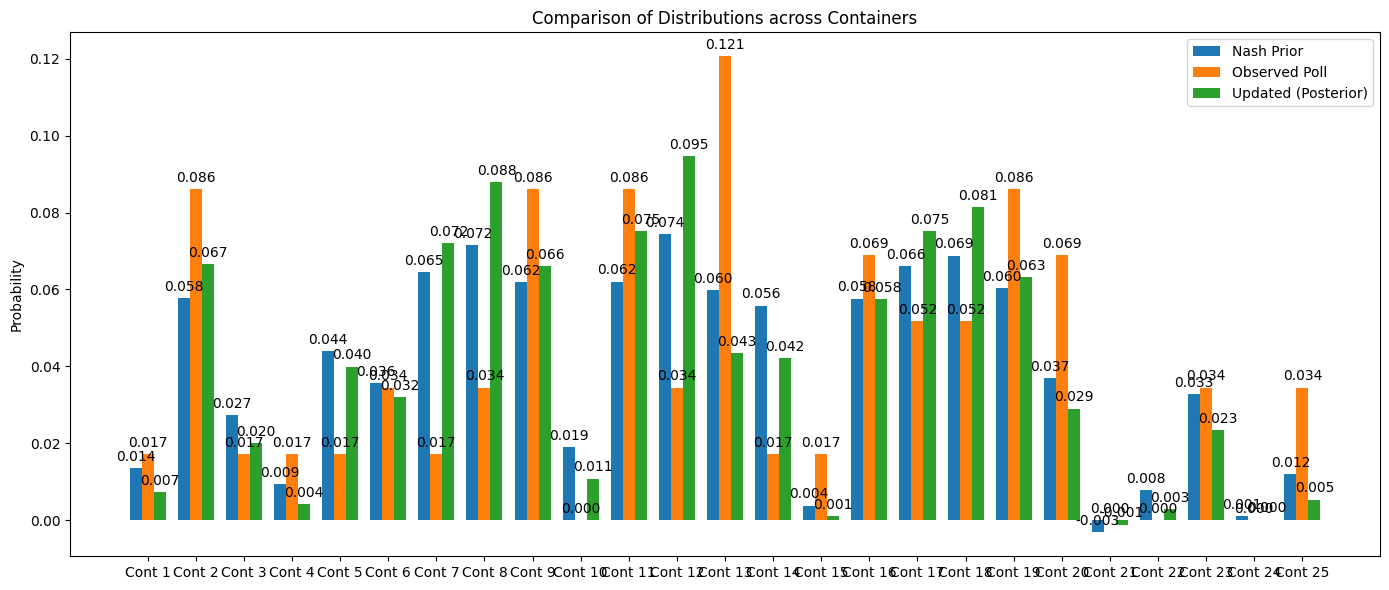

   Container  Multiplier  Base  Nash Prior  Observed Poll  Updated Prior
0     Cont 1          24     2    0.013543       0.017241       0.007306
1     Cont 2          70     4    0.057834       0.086207       0.066603
2     Cont 3          41     3    0.027303       0.017241       0.019988
3     Cont 4          21     2    0.009350       0.017241       0.004122
4     Cont 5          60     4    0.043857       0.017241       0.039916
5     Cont 6          47     3    0.035688       0.034483       0.031979
6     Cont 7          82     5    0.064605       0.017241       0.071986
7     Cont 8          87     5    0.071593       0.034483       0.087988
8     Cont 9          80     5    0.061810       0.086207       0.065999
9    Cont 10          35     3    0.018917       0.000000       0.010803
10   Cont 11          73     4    0.062027       0.086207       0.075125
11   Cont 12          89     5    0.074389       0.034483       0.094707
12   Cont 13         100     8    0.059762       0.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define Container Parameters
# -----------------------------
# For 25 containers, the following arrays represent:
# - multipliers: the container multipliers.
# - bases: the “base” (inhabitants) value.
# (Containers are numbered 1 through 25.)
multipliers = np.array([24, 70, 41, 21, 60, 47, 82, 87, 80, 35, 73, 89, 100, 90, 17, 77, 83, 85, 79, 55, 12, 27, 52, 15, 30])
bases       = np.array([2, 4, 3, 2, 4, 3, 5, 5, 5, 3, 4, 5, 8, 7, 2, 5, 5, 5, 5, 4, 2, 3, 4, 2, 3])

# -----------------------------
# 2. Compute Nash Equilibrium Prior (Continuum Approximation)
# -----------------------------
# We assume the per-player payoff is given by:
#   u_i = m_i / (base_i + (n_i/300)).
# With n_i = total_players * x_i and total_players/300 = 100,
# this becomes: u_i = m_i / (base_i + 100*x_i).
# In equilibrium (all u_i equal U) we have:
#   x_i = (m_i/U - base_i)/100.
# With normalization (sum_i x_i = 1), one may show that:
#   U = sum(multipliers) / (100 + sum(bases)).
total_players = 30000
U = np.sum(multipliers) / (100 + np.sum(bases))

nash_x = (multipliers / U - bases) / 100
nash_x /= np.sum(nash_x)  # Normalize to sum to 1

# -----------------------------
# 3. Define Behavioral Likelihood Factors
# -----------------------------
# 3a. Likelihood for Raw Attractiveness (Level‑0)
# We use the ratio: attractiveness = multiplier / base.
attractiveness = multipliers / bases

def softmax(a, alpha):
    # Returns the softmax of array a with sensitivity alpha.
    exp_a = np.exp(alpha * (a - np.max(a)))  # for numerical stability
    return exp_a / np.sum(exp_a)

alpha_attr = 0.3  # Sensitivity parameter for attractiveness
L_attr = softmax(attractiveness, alpha_attr)

# 3b. Likelihood for Overcrowding Adjustment (Level‑1)
# Compute the ratio of the attractiveness likelihood to the Nash prior:
r = L_attr / nash_x
# We set:
#    L_crowd = exp[ -beta * (r - 1) ]
beta = 0.5   # Penalty strength from behavioral studies
L_crowd = np.exp(-beta * (r - 1))
# (Optionally normalize L_crowd to bring it onto a similar scale.)
L_crowd /= np.sum(L_crowd)

# -----------------------------
# 4. Bayesian Update: Combine Nash Prior with the Likelihoods
# -----------------------------
# Let the updated (posterior) probability be proportional to:
#   p_i ∝ nash_x_i * (L_attr_i)^w1 * (L_crowd_i)^w2
w1 = 0.5  # Weight for the attractiveness likelihood
w2 = 0.5  # Weight for the overcrowding likelihood

combined = nash_x * (L_attr ** w1) * (L_crowd ** w2)
updated_prior = combined / np.sum(combined)

# -----------------------------
# 5. Process Poll Data (Observed Distribution)
# -----------------------------
# The poll data from last year is provided as a list of chosen container multipliers.
# We need to count the frequency of each container (match by multiplier).
poll_data = [
    73, 100, 100, 70, 100, 87, 47, 83, 79, 24,
    70, 73, 52, 52, 80, 89, 73, 73, 85, 70,
    17, 30, 30, 100, 85, 47, 82, 85, 60, 89,
    77, 83, 55, 79, 77, 80, 70, 79, 80, 87,
    100, 100, 79, 79, 55, 73, 83, 100, 90, 80,
    55, 41, 80, 77, 77, 21, 55, 70
]
poll_data = np.array(poll_data)

# Create an array to hold counts for each container.
# We assume that the container's multiplier uniquely identifies it.
observed_counts = np.zeros(len(multipliers))
for value in poll_data:
    # Find the container index corresponding to this multiplier.
    # (Assume each multiplier appears only once in our table.)
    idx = np.where(multipliers == value)[0]
    if idx.size > 0:
        observed_counts[idx[0]] += 1
# Convert counts to frequencies:
observed_x = observed_counts / np.sum(observed_counts)

# -----------------------------
# 6. Plot and Compare the Distributions
# -----------------------------
labels = [f'Cont {i+1}' for i in range(len(multipliers))]
x_axis = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(x_axis - width, nash_x, width, label='Nash Prior')
bar2 = ax.bar(x_axis, observed_x, width, label='Observed Poll')
bar3 = ax.bar(x_axis + width, updated_prior, width, label='Updated (Posterior)')

ax.set_ylabel('Probability')
ax.set_title('Comparison of Distributions across Containers')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label displaying the height on each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()

# -----------------------------
# 7. Output a Summary Table
# -----------------------------
df = pd.DataFrame({
    'Container': labels,
    'Multiplier': multipliers,
    'Base': bases,
    'Nash Prior': nash_x,
    'Observed Poll': observed_x,
    'Updated Prior': updated_prior
})
print(df)

In [3]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import theano.tensor as tt

# ------------------------------
# 1. Data and Container Parameters
# ------------------------------
# We use 25 containers (as in your previous data).
# multipliers and bases come from the container table.
multipliers = np.array([24, 70, 41, 21, 60, 47, 82, 87, 80, 35, 73, 89, 100, 90, 17, 77, 83, 85, 79, 55, 12, 27, 52, 15, 30])
bases       = np.array([2, 4, 3, 2, 4, 3, 5, 5, 5, 3, 4, 5, 8, 7, 2, 5, 5, 5, 5, 4, 2, 3, 4, 2, 3])
total_players = 30000

# Poll data: These are the chosen container multipliers from last year.
poll_data = [
    73, 100, 100, 70, 100, 87, 47, 83, 79, 24,
    70, 73, 52, 52, 80, 89, 73, 73, 85, 70,
    17, 30, 30, 100, 85, 47, 82, 85, 60, 89,
    77, 83, 55, 79, 77, 80, 70, 79, 80, 87,
    100, 100, 79, 79, 55, 73, 83, 100, 90, 80,
    55, 41, 80, 77, 77, 21, 55, 70
]
poll_data = np.array(poll_data)
# Count observed frequencies per container (by matching multiplier)
observed_counts = np.zeros(len(multipliers))
for value in poll_data:
    idx = np.where(multipliers == value)[0]
    if idx.size > 0:
        observed_counts[idx[0]] += 1
observed_x = observed_counts / np.sum(observed_counts)

# ------------------------------
# 2. Nash Equilibrium Prior Calculation
# ------------------------------
# We assume payoff: u_i = m_i / (base_i + 100 * x_i), and equilibrium requires:
#   x_i = (m_i/U - base_i) / 100, with U = sum(multipliers) / (100 + sum(bases)).
sum_m = np.sum(multipliers)
sum_b = np.sum(bases)
U = sum_m / (100 + sum_b)
nash_x = (multipliers / U - bases) / 100
nash_x = nash_x / np.sum(nash_x)  # Normalize

# ------------------------------
# 3. Define the Updated Prior as a Function of alpha and beta
# ------------------------------
import theano
def updated_prior_func(alpha, beta, w1=0.5, w2=0.5):
    """
    Compute updated prior probabilities based on alpha and beta.
    
    Parameters:
      alpha: softmax sensitivity for raw attractiveness.
      beta: overcrowding penalty strength.
      w1, w2: weights for the two likelihoods.
      
    Returns:
      Updated probabilities (vector of length equal to number of containers).
    """
    # Compute raw attractiveness likelihood via softmax over multiplier/base.
    attractiveness = multipliers / bases
    # To maintain numerical stability, subtract max.
    exp_val = np.exp(alpha * (attractiveness - np.max(attractiveness)))
    L_attr = exp_val / np.sum(exp_val)
    
    # Compute ratio r_i: relative to the Nash prior.
    r = L_attr / nash_x
    # Overcrowding likelihood: penalize if r_i > 1.
    L_crowd = np.exp(-beta * (r - 1))
    # Normalize L_crowd to be on a comparable scale
    L_crowd = L_crowd / np.sum(L_crowd)
    
    # Combine with Nash prior.
    combined = nash_x * (L_attr ** w1) * (L_crowd ** w2)
    updated = combined / np.sum(combined)
    return updated

# For use within Theano, we create a wrapper.
def updated_prior_theano(alpha, beta):
    # Use tt.as_tensor_variable to convert nash_x and others to theano tensors.
    # For simplicity, we will compute in numpy and convert to a theano constant.
    up = updated_prior_func(alpha, beta)
    return theano.shared(up)

# ------------------------------
# 4. Bayesian Model with PyMC3
# ------------------------------
import pymc3 as pm

with pm.Model() as model:
    # Priors for alpha and beta. We choose Uniform priors based on our domain.
    alpha_param = pm.Uniform('alpha', lower=0.1, upper=1.0)
    beta_param  = pm.Uniform('beta', lower=0.1, upper=2.0)
    
    # Use a deterministic function to compute the updated prior.
    # Because our updated_prior_func is currently based on numpy (non-symbolic),
    # we define a lambda that uses theano's as_tensor_variable.
    # (For a more fully symbolic approach, one could re-write the function using Theano operations.)
    def up_func(alpha, beta):
        # Here, we use a workaround: use pm.math.constant of the computed result.
        res = updated_prior_func(alpha, beta)
        return pm.math.constant(res)
    
    updated_prob = pm.Deterministic('updated_prob', up_func(alpha_param, beta_param))
    
    # Likelihood: we model the observed frequencies as drawn from a Dirichlet distribution.
    # We introduce a concentration parameter, which controls the dispersion around the mean.
    concentration = pm.Gamma('concentration', alpha=2, beta=1)
    obs = pm.Dirichlet('obs', a=updated_prob * concentration, observed=observed_x)
    
    # Sample from the posterior:
    trace = pm.sample(2000, tune=2000, cores=1, random_seed=42)

# ------------------------------
# 5. Posterior Analysis
# ------------------------------
print(pm.summary(trace, var_names=['alpha', 'beta']))

# Plot the posterior distributions of alpha and beta.
pm.traceplot(trace, var_names=['alpha', 'beta'])
plt.tight_layout()
plt.show()

# ------------------------------
# 6. Compare Distributions Using Fitted Parameters
# ------------------------------
# Compute the median values from the posterior samples.
fitted_alpha = np.median(trace['alpha'])
fitted_beta = np.median(trace['beta'])
print("Fitted alpha:", fitted_alpha)
print("Fitted beta:", fitted_beta)

# Compute the updated prior using the fitted parameters.
fitted_updated_prior = updated_prior_func(fitted_alpha, fitted_beta)

labels = [f'Cont {i+1}' for i in range(len(multipliers))]
df = pd.DataFrame({
    'Container': labels,
    'Nash Prior': nash_x,
    'Observed Poll': observed_x,
    'Fitted Updated Prior': fitted_updated_prior
})
print(df)

# Plot all three distributions:
x_axis = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(x_axis - width, nash_x, width, label='Nash Prior')
bar2 = ax.bar(x_axis, observed_x, width, label='Observed Poll')
bar3 = ax.bar(x_axis + width, fitted_updated_prior, width, label='Fitted Updated Prior')
ax.set_ylabel('Probability')
ax.set_title('Comparison: Nash, Observed, and Fitted Updated Priors')
ax.set_xticks(x_axis)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'pymc3'

In [15]:
import jax
print(jax.__version__)
import jax.numpy as jnp
print(jnp.array([1, 2, 3]))

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)